In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans
from MyML.metrics.accuracy import HungarianIndex

In [78]:
import seaborn as sns

In [123]:
# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
tableau10 = tableau20[::2]
tableau = tableau10
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau)):  
    r, g, b = tableau[i]  
    tableau[i] = (r / 255., g / 255., b / 255.)
pallete = sns.color_palette(tableau)

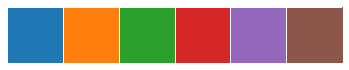

In [124]:
sns.palplot(pallete)
sns.set_palette(pallete)

In [7]:
iris = load_iris()

In [16]:
data = iris.data
gt = iris.target

In [60]:
data, gt = make_blobs(n_samples=200, n_features=2, centers=5)

In [136]:
imgpath = "/home/chiroptera/workspace/thesis_writing/rsc/introduction/img/"

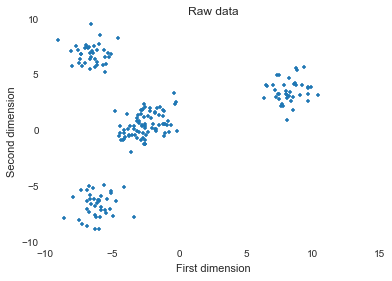

In [137]:
#plt.axis([-10, 10, -10, 10])
#plt.axis('auto')
plt.title("Raw data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.plot(data[:,0], data[:,1], '.')
plt.savefig(imgpath + 'cluster_example_raw.eps', bbox_inches='tight')

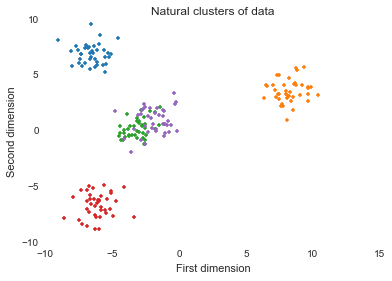

In [138]:
#plt.axis([-10, 10, -10, 10])
#plt.axis('auto')
plt.title("Natural clusters of data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.box(on='on')
for c in np.unique(gt):
    idx = gt == c
    plt.plot(data[idx,0], data[idx,1], '.')
plt.savefig(imgpath + 'cluster_example_natural.eps', bbox_inches='tight')

In [140]:
grouper = KMeans(n_clusters=4)
acc = HungarianIndex(nsamples=data.shape[0])

In [141]:
grouper.fit(data)
acc.score(gt, grouper.labels_)
print "accuracy: ", acc.accuracy

accuracy:  0.2


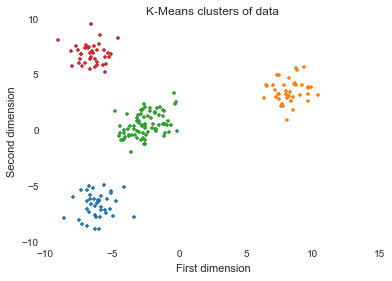

In [142]:
#plt.axis([4, 9, 1, 5])
#plt.axis('auto')
plt.title("K-Means clusters of data")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
for c in np.unique(grouper.labels_):
    idx = grouper.labels_ == c
    plt.plot(data[idx,0], data[idx,1], '.')
plt.savefig(imgpath + 'cluster_example_kmeans.eps', bbox_inches='tight')